<a href="https://colab.research.google.com/github/singh-prishita/MLFinalAssignment/blob/main/ML_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import datetime
import re

from itertools import chain

%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Checking to make sure it pickled correctly:
df_clean_listings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_clean_listings.pkl')
df_clean_listings.shape

(7468, 77)

In [5]:
df_clean_listings.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms', 'bathroom_shared', 'days_since_first_review',
       'days_since_last_review', 'coffee_machine', 'wifi', 'fireplace',
       'microwave', 'parking', 'bathroom_essentials', 'pool',
       'terrace_patio_balcony', 'bathtub', 'sauna', 'bikes', 'iron',
       'garden_backyard', 'workspace', 'tv', 'air_conditioning',
       'pets_allowed', 'bbq_grill', 'crib', 'gym', 'bed_linens', 'hair_dryer',
       'luggage_d

In [6]:
df_clean_listings.head()

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Dn Laoghaire-Rathdown,neighbourhood_cleansed_Dublin City,neighbourhood_cleansed_Fingal,neighbourhood_cleansed_South Dublin,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,44077,100.0,99.0,2,2,53.29178,-6.25792,2,1.0,2.0,...,0,1,1,0,0,0,0,0,1,0
1,85156,100.0,99.0,2,2,53.29209,-6.25624,2,1.0,1.0,...,0,1,1,0,0,0,0,0,1,0
2,159889,100.0,95.0,3,4,53.39027,-6.23547,1,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
3,162809,92.0,87.0,2,2,53.28326,-6.19188,6,2.0,4.0,...,0,1,1,0,0,0,0,0,1,0
4,165828,100.0,91.0,5,5,53.33744,-6.32363,5,1.0,3.0,...,0,1,0,1,0,0,1,0,0,0


Score of Dummy Regression model: 0.0
[-0.39788235 -0.71150255 -0.57855161 -0.19678735 -0.05290083]
Accuracy: -0.39 (+/− 0.24)
Score of Linear Regression model: 0.20916289679241917
square error 0.399729 0.509653
Score of Ridge model: 0.20916073886933106
Score of Ridge model: 0.20916280969665701
Score of Ridge model: 0.2091628749938258
Score of Ridge model: 0.20916289591968462
Score of Ridge model: 0.20916289657421072
Score of Ridge model: 0.20916289678368982
Score of Ridge model: 0.20916289679023692
square error 0.399729 0.509653
Score of Ridge model: 0.20916289679023692


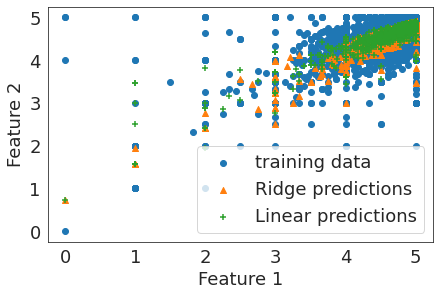

In [20]:
X1 = df_clean_listings['review_scores_cleanliness'];
X2 = df_clean_listings['review_scores_value'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_rating'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));







import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()



Score of Dummy Regression model: 0.0
[-0.05585832 -0.03643249 -0.04916869 -0.04704528 -0.05414527]
Accuracy: -0.05 (+/− 0.01)
Score of Linear Regression model: 0.6181595518799882
square error 0.050485 0.135554
Score of Ridge model: 0.6181464523308566
Score of Ridge model: 0.6181590209271701
Score of Ridge model: 0.6181594189206758
Score of Ridge model: 0.6181595465545189
Score of Ridge model: 0.6181595505483988
Score of Ridge model: 0.6181595518267176
Score of Ridge model: 0.6181595518666704
square error 0.050485 0.135554
Score of Ridge model: 0.6181595518666704


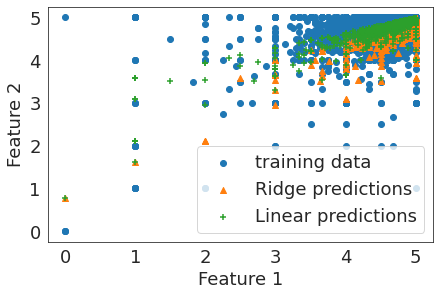

In [21]:
X1 = df_clean_listings['review_scores_cleanliness'];
X2 = df_clean_listings['review_scores_checkin'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_accuracy'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));

import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()


Score of Dummy Regression model: 0.0
[-0.10887973 -0.10130742 -0.10014595 -0.12865857 -0.09704868]
Accuracy: -0.11 (+/− 0.01)
Score of Linear Regression model: 0.5372499091454368
square error 0.112109 0.211563
Score of Ridge model: 0.5372407414490434
Score of Ridge model: 0.5372495379670765
Score of Ridge model: 0.5372498162086194
Score of Ridge model: 0.5372499054233963
Score of Ridge model: 0.5372499082147838
Score of Ridge model: 0.5372499091082061
Score of Ridge model: 0.5372499091361291
square error 0.112109 0.211563
Score of Ridge model: 0.5372499091361291


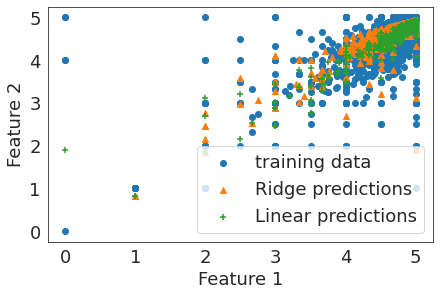

In [22]:
X1 = df_clean_listings['review_scores_accuracy'];
X2 = df_clean_listings['review_scores_value'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_cleanliness'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));



import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()





Score of Dummy Regression model: 0.0
[-0.05240655 -0.02955785 -0.03745526 -0.05168617 -0.03892353]
Accuracy: -0.04 (+/− 0.01)
Score of Linear Regression model: 0.6055715260279368
square error 0.053842 0.134625
Score of Ridge model: 0.605551157461153
Score of Ridge model: 0.6055706983541156
Score of Ridge model: 0.6055713186963552
Score of Ridge model: 0.6055715177213943
Score of Ridge model: 0.6055715239508853
Score of Ridge model: 0.6055715259448415
Score of Ridge model: 0.6055715260071626
square error 0.053842 0.134625
Score of Ridge model: 0.6055715260071626


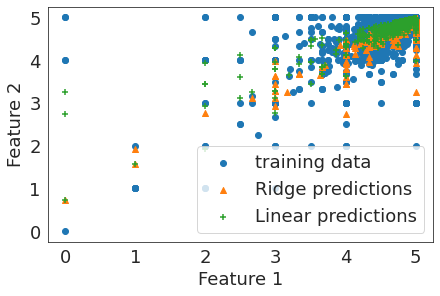

In [23]:
X1 = df_clean_listings['review_scores_accuracy'];
X2 = df_clean_listings['review_scores_communication'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_checkin'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));


import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()



Score of Dummy Regression model: 0.0
[-0.05035521 -0.02449134 -0.0295071  -0.05996702 -0.04510711]
Accuracy: -0.04 (+/− 0.01)
Score of Linear Regression model: 0.5713375380879981
square error 0.051669 0.107439
Score of Ridge model: 0.5713119311090382
Score of Ridge model: 0.5713364882758378
Score of Ridge model: 0.5713372748142864
Score of Ridge model: 0.5713375275306382
Score of Ridge model: 0.5713375354478305
Score of Ridge model: 0.571337537982365
Score of Ridge model: 0.5713375380615892
square error 0.051669 0.107439
Score of Ridge model: 0.5713375380615892


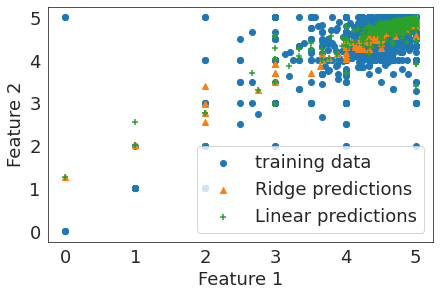

In [24]:
X1 = df_clean_listings['review_scores_accuracy'];
X2 = df_clean_listings['review_scores_checkin'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_communication'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));



import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()



Score of Dummy Regression model: 0.0
[-0.06379529 -0.07928397 -0.06246762 -0.06418599 -0.0915342 ]
Accuracy: -0.07 (+/− 0.01)
Score of Linear Regression model: 0.27265253280267754
square error 0.076155 0.101871
Score of Ridge model: 0.27264838274864855
Score of Ridge model: 0.27265236513450986
Score of Ridge model: 0.2726524908327618
Score of Ridge model: 0.2726525311221837
Score of Ridge model: 0.27265253238250087
Score of Ridge model: 0.27265253278586865
Score of Ridge model: 0.27265253279847523
square error 0.076155 0.101871
Score of Ridge model: 0.27265253279847523


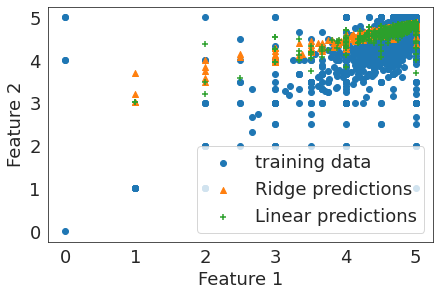

In [25]:
X1 = df_clean_listings['review_scores_accuracy'];
X2 = df_clean_listings['review_scores_value'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_location'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));

import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()



Score of Dummy Regression model: 0.0
[-0.09466872 -0.05090236 -0.06540824 -0.07779666 -0.09339876]
Accuracy: -0.08 (+/− 0.02)
Score of Linear Regression model: 0.4861686954578742
square error 0.060751 0.158582
Score of Ridge model: 0.4861601858675959
Score of Ridge model: 0.48616834926696106
Score of Ridge model: 0.48616860872502043
Score of Ridge model: 0.48616869198261214
Score of Ridge model: 0.48616869458887246
Score of Ridge model: 0.48616869542310814
Score of Ridge model: 0.4861686954491825
square error 0.060751 0.158582
Score of Ridge model: 0.4861686954491825


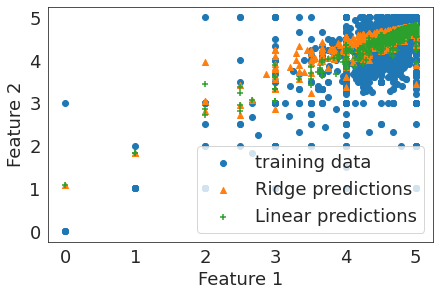

In [26]:
X1 = df_clean_listings['review_scores_accuracy'];
X2 = df_clean_listings['review_scores_cleanliness'];
X = np.column_stack((X1,X2));
y = df_clean_listings['review_scores_value'];

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print("Score of Dummy Regression model:", dummy.score(Xtrain, ytrain));
from sklearn.metrics import mean_squared_error




from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

print("Score of Linear Regression model:", model.score(Xtrain, ytrain));


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
ypreds = model.predict(Xtest)
from sklearn.metrics import mean_squared_error
print("square error %f %f"%(mean_squared_error(ytest,ypreds),mean_squared_error(ytest,ydummy)))



mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
 from sklearn.linear_model import Ridge
 model = Ridge(alpha=1/(2*Ci))
 temp=[]
 model.fit(Xtrain, ytrain)
 ypred = model.predict(Xtest)
 print("Score of Ridge model:", model.score(Xtrain, ytrain));
 temp.append(mean_squared_error(ytest,ypred))
from sklearn.metrics import mean_squared_error
temp.append(mean_squared_error(ytest,ypred))
mean_error.append(np.array(temp).mean())

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))
print("Score of Ridge model:", model.score(Xtrain, ytrain));

import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1, X2)
ypred = model.predict(Xtest)
plt.scatter(Xtest[:,1], ypred, marker='^')
plt.scatter(Xtest[:,0], ypreds, marker='+')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend(['training data','Ridge predictions','Linear predictions'])
plt.show()

